## Jess's DIGBlood IPython notebook

In [14]:
# Import stuff
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy
from scipy.stats import pearsonr
from __future__ import division
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [15]:
import os
bloodPath =  os.path.abspath(os.path.join(os.getcwd(),'..'))
trainPath =  os.path.join(bloodPath,'data','raw','blood_train.csv')
print trainPath

C:\Users\dss-lu-shahin\Documents\GitHub\digblood\data\raw\blood_train.csv


In [16]:
df = pd.DataFrame.from_csv(trainPath)
df.columns = [c.replace(' ', '_') for c in df.columns]

In [17]:
#Show the first few lines of the database
df[:5]

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated_(c.c.),Months_since_First_Donation,Made_Donation_in_March_2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [18]:

pearsonr(df['Number_of_Donations'],df['Total_Volume_Donated_(c.c.)'])

(1.0, 0.0)

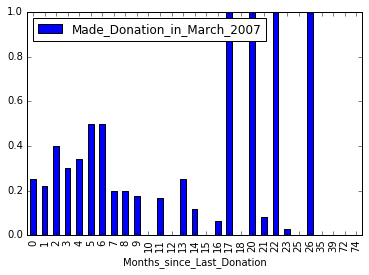

In [19]:
data = df[['Months_since_Last_Donation','Made_Donation_in_March_2007']].groupby(['Months_since_Last_Donation']).mean().plot(kind = 'bar')


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


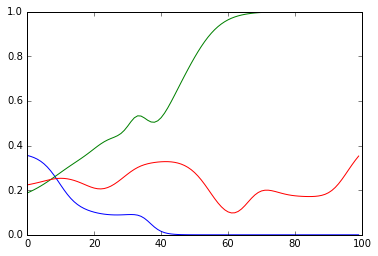

In [76]:
# From http://stackoverflow.com/questions/18517722/weighted-moving-average-in-python 
def weighted_moving_average(x,y,step_size=0.05,width=1,bin_range =[0, 1]):
    bin_centers  = np.arange(bin_range[0],bin_range[1])
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

df = df.sort_values('Months_since_Last_Donation')
x = df['Months_since_Last_Donation'].values #.apply(lambda x: np.log(x)).
y = df['Made_Donation_in_March_2007'].values
x_outLD,y_outLD = weighted_moving_average(x,y,step_size = 1,width = 5, bin_range = [0, 100])
#print smoothed
plt.plot(x_outLD,y_outLD)
fLD = scipy.interpolate.interp1d(x_outLD,y_outLD)

df = df.sort_values('Number_of_Donations')
x = df['Number_of_Donations'].values #.apply(lambda x: np.log(x)).
y = df['Made_Donation_in_March_2007'].values
x_outND,y_outND = weighted_moving_average(x,y,step_size = 1,width = 5, bin_range = [0, 100])
#print smoothed
plt.plot(x_outND,y_outND)
fND = scipy.interpolate.interp1d(x_outND,y_outND)
print x_outND

df = df.sort_values('Months_since_First_Donation')
x = df['Months_since_First_Donation'].values #.apply(lambda x: np.log(x)).
y = df['Made_Donation_in_March_2007'].values
x_outFD,y_outFD = weighted_moving_average(x,y,step_size = 1,width = 5, bin_range = [0, 100])
#print smoothed
plt.plot(x_outFD,y_outFD)
fFD = scipy.interpolate.interp1d(x_outFD,y_outFD)
print x_outFD
#plt.bar(data.index,data.Made_Donation_in_March_2007)

In [54]:
print x

[ 0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9 10 10 10 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11

Since Total Volume Donated adds no information, I won't include it as a feature.

In [55]:
df.drop('Total_Volume_Donated_(c.c.)', axis = 1)
model = smf.ols('Made_Donation_in_March_2007 ~ Months_since_Last_Donation + Number_of_Donations + Months_since_First_Donation', data = df)
result = model.fit()
result.summary()
result.fittedvalues

436    0.366096
214    0.343896
676    0.310818
664    0.515535
607    0.347716
182    0.285178
106    0.325693
358    0.602107
258    0.394102
164    0.462686
285    0.448608
330    0.437552
441    0.551485
556    0.272668
247    0.308770
589    0.308770
220    0.308770
410    0.308770
687    0.303761
619    1.106322
486    0.270506
375    0.294691
124    0.339091
392    0.308770
291    0.308770
88     0.308770
19     0.288645
434    0.218251
631    0.292705
342    0.237251
         ...   
645    0.029055
538    0.059198
451    0.640713
325    0.254074
193    0.104635
378    0.068268
597   -0.109064
295   -0.080818
475    0.021971
141    0.046068
576    0.046068
78     0.059198
110    0.046068
588    0.046068
388    0.046068
117    0.046068
514    0.014976
739    0.036050
604    0.039073
22     0.327756
595    0.046157
210    0.053152
180    0.060236
554    0.046068
183    0.056467
281    0.027804
673   -0.147321
541   -0.154085
74    -0.566903
350   -0.591922
dtype: float64

In [56]:
df.keys()


Index([u'Months_since_Last_Donation', u'Number_of_Donations',
       u'Total_Volume_Donated_(c.c.)', u'Months_since_First_Donation',
       u'Made_Donation_in_March_2007'],
      dtype='object')

In [57]:
mean = df['Made_Donation_in_March_2007'].mean()
df['Means'] = np.ones([576,1])*mean
print df['Means']

436    0.239583
214    0.239583
676    0.239583
664    0.239583
607    0.239583
182    0.239583
106    0.239583
358    0.239583
258    0.239583
164    0.239583
285    0.239583
330    0.239583
441    0.239583
556    0.239583
247    0.239583
589    0.239583
220    0.239583
410    0.239583
687    0.239583
619    0.239583
486    0.239583
375    0.239583
124    0.239583
392    0.239583
291    0.239583
88     0.239583
19     0.239583
434    0.239583
631    0.239583
342    0.239583
         ...   
645    0.239583
538    0.239583
451    0.239583
325    0.239583
193    0.239583
378    0.239583
597    0.239583
295    0.239583
475    0.239583
141    0.239583
576    0.239583
78     0.239583
110    0.239583
588    0.239583
388    0.239583
117    0.239583
514    0.239583
739    0.239583
604    0.239583
22     0.239583
595    0.239583
210    0.239583
180    0.239583
554    0.239583
183    0.239583
281    0.239583
673    0.239583
541    0.239583
74     0.239583
350    0.239583
Name: Means, dtype: floa

In [119]:
model = (fLD(df['Months_since_Last_Donation'])*1+fFD(df['Months_since_First_Donation'])*0+fND(df['Number_of_Donations'])*1+df['Means']*0)/3


In [120]:
# Training evaluation
from sklearn.metrics import log_loss
pred = np.array(df.Means)
actual = df['Made_Donation_in_March_2007']
print 'Training log-loss score ' + str(log_loss(actual,pred))

Training log-loss score 0.550599168862


In [121]:
# Training evaluation
from sklearn.metrics import log_loss
pred = np.array(model)
actual = df['Made_Donation_in_March_2007']
print 'Training log-loss score ' + str(log_loss(actual,pred))


Training log-loss score 0.536515399682
